# Continuous Contractual

In [1]:
import numpy as np
import pandas as pd

import pymc as pm
import pandas as pd

from pymc_marketing.clv.distributions import ContContract

import matplotlib.pyplot as plt
import arviz as az

In [2]:
rng = np.random.RandomState(seed=34)
T = 10
T0 = 0

# individual-level model
lam = 0.5; p_true = 0.2

In [3]:
dist = ContContract.dist(lam, p_true, T, T0, shape=(1000,))
data = pm.draw(dist, random_seed=rng)
data[:5]

array([7.108901, 5.      , 1.      ])

In [4]:
with pm.Model() as model:

    λ = pm.Gamma(name="λ", alpha=1, beta=1)
    π = pm.Beta(name="π", alpha=1, beta=1)
    
    cont_contractual = ContContract(
        name="continuous-contractual-clv",
        lam=λ,
        p=π,
        T=10,
        T0=0,
        observed=data,
    )
    
    trace = pm.sample(draws=2000, chains=1, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [λ, π]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 2 seconds.
/home/ricardo/miniconda3/envs/pymmmc/lib/python3.10/site-packages/arviz/data/base.py:221: UserWarning: More chains (2000) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


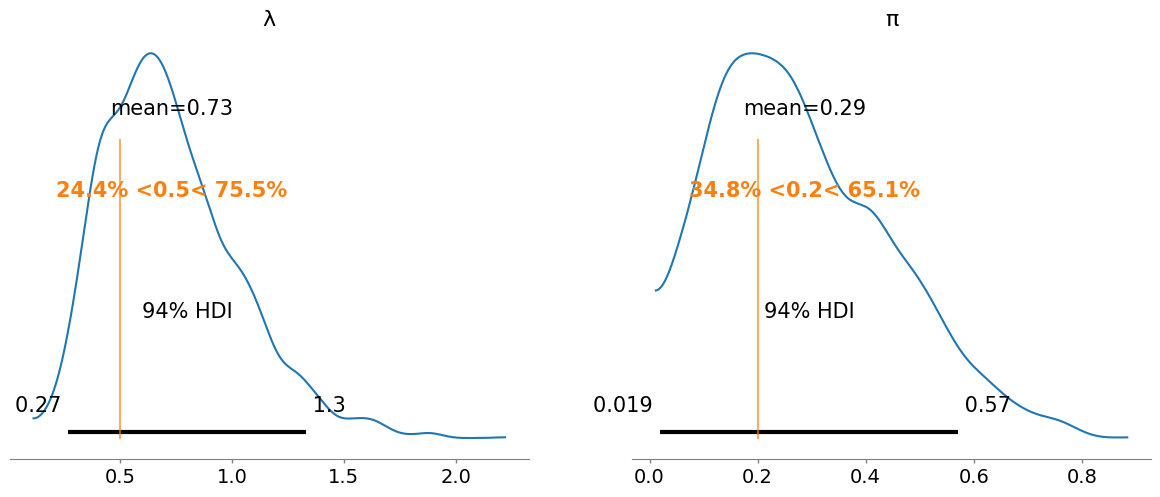

In [5]:
_ = az.plot_posterior(trace, ref_val=[lam, p_true])